<a href="https://colab.research.google.com/github/Amilcar28/Amilcar28/blob/main/IAG_exercices_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plot** de series temporais apartir dos dados do EXcell Horario

In [1]:
#1.Importe as bibliotecas necessárias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#2.Carregue os dados do Excel para um DataFrame do pandas
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Meteo PEG_2013_hora_cor.xlsx')
df.tail(3)

,date,hour,Temp_celsius,UR_%,PRESS_kPa,Vh_m/s,RAIN_mm,Ki_W/m2,Kr_W/m2,Rn _W/m2
8757,2013-12-31,21:00:00,23.280000,89.349998,93.083332,3.092583,0.0,0.206000,0.0,-27.483333
8758,2013-12-31,22:00:00,23.476667,88.133331,93.149998,3.080222,0.0,0.222000,0.0,-21.440000
8759,2013-12-31,23:00:00,23.553334,87.483334,93.199997,3.141055,0.0,0.214333,0.0,-18.541667


In [3]:
df.date.values # Imprimir a coluna das datas> mes, dia e ano

array(['2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', ...,
       '2013-12-31T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
# Passo 3: Configurar a coluna de data/hora como índice
df.set_index('date', inplace=True)
datetime = pd.to_datetime(df.index)
df['date'] = datetime.date
df['hour'] = datetime.time

In [5]:
df.hour.values # Imprimir a coluna das datas> mes, dia e ano

array([datetime.time(0, 0), datetime.time(0, 0), datetime.time(0, 0), ...,
       datetime.time(0, 0), datetime.time(0, 0), datetime.time(0, 0)],
      dtype=object)

In [6]:
# Passo 2: Converter a coluna de data/hora
# Suponha que a coluna de data/hora seja chamada 'timestamp'
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.Temp_celsius.values

array([22.49000041, 21.93999958, 21.5716664 , ..., 23.27999974,
       23.47666677, 23.5533336 ])

In [8]:
import pandas as pd

# Assuming you have an existing DataFrame called 'df' with the columns you mentioned
df2 = pd.DataFrame(columns=['Data', 'Hour', 'tmp', 'RH', 'QNH_kpa', 'V_wind', 'tp_mm', 'KI', 'KR', 'RN'])
# Create a list of column names
columns = ['Data', 'Hour', 'tmp', 'RH', 'QNH_kpa', 'V_wind', 'tp_mm', 'KI', 'KR', 'RN']

# Populate the DataFrame with values from 'df'
df2['Data'] = df['date'].values # Changed 'Date' to 'date'
df2['Hour'] = df['hour'].values  # Use 'hour' instead of 'time'
df2['tmp'] = df['Temp_celsius'].values
df2['RH'] = df['UR_%'].values
df2['QNH_kpa'] = df['PRESS_kPa'].values
df2['V_wind'] = df['Vh_m/s'].values
df2['tp_mm'] = df['RAIN_mm'].values
df2['KI'] = df['Ki_W/m2'].values
df2['KR'] = df['Kr_W/m2'].values
df2['RN'] = df['Rn _W/m2'].values

print(df2)

           Data      Hour        tmp         RH    QNH_kpa    V_wind  tp_mm  \
0    2013-01-01  00:00:00  22.490000  82.665001  93.199997  2.477389    0.0   
1    2013-01-01  00:00:00  21.940000  85.716668  93.133331  2.250305    0.0   
2    2013-01-01  00:00:00  21.571666  87.283333  93.083332  1.365222    0.0   
3    2013-01-01  00:00:00  21.903334  83.783334  93.000000  2.202083    0.0   
4    2013-01-01  00:00:00  21.623334  85.883334  93.000000  1.990472    0.0   
...         ...       ...        ...        ...        ...       ...    ...   
8755 2013-12-31  00:00:00  25.115000  87.066667  92.950001  2.059500    0.0   
8756 2013-12-31  00:00:00  23.951667  90.433333  93.000000  2.697722    0.0   
8757 2013-12-31  00:00:00  23.280000  89.349998  93.083332  3.092583    0.0   
8758 2013-12-31  00:00:00  23.476667  88.133331  93.149998  3.080222    0.0   
8759 2013-12-31  00:00:00  23.553334  87.483334  93.199997  3.141055    0.0   

             KI        KR         RN  
0      0.404

In [9]:
import datetime

time_obj = datetime.time(10, 30, 15)  # Example time: 10:30:15

seconds_since_midnight = (time_obj.hour * 3600) + (time_obj.minute * 60) + time_obj.second

float_value = float(seconds_since_midnight)
print(float_value)  # Output: 38235.0

37815.0


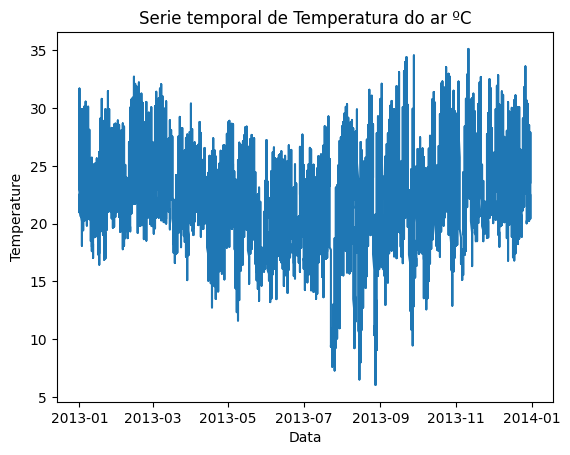

In [10]:
# Filter data for the specified date range
df2['Data'] = pd.to_datetime(df2['Data'])
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2013-12-31')
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.plot(filtered_df['Data'], filtered_df['tmp'])
plt.xlabel('Data')
plt.ylabel('Temperature')
plt.title('Serie temporal de Temperatura do ar ºC')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/Serie_temporal_Temperatura_do_ar.png')

plt.show()


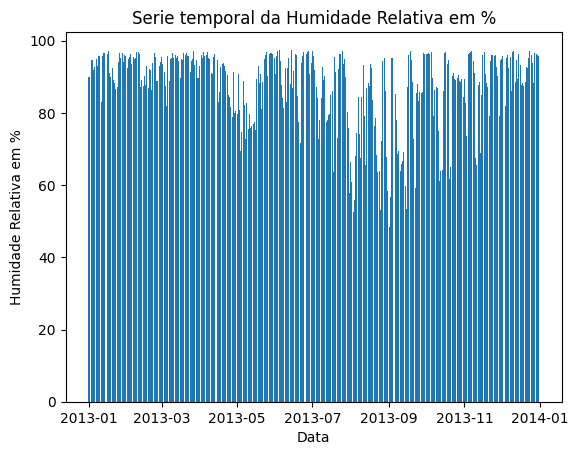

In [13]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.bar(filtered_df['Data'], filtered_df['RH'])
plt.xlabel('Data')
plt.ylabel('Humidade Relativa em %')
plt.title('Serie temporal da Humidade Relativa em %')
plt.xticks(rotation=0)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Humidade Relativahoraria.png')

plt.show()


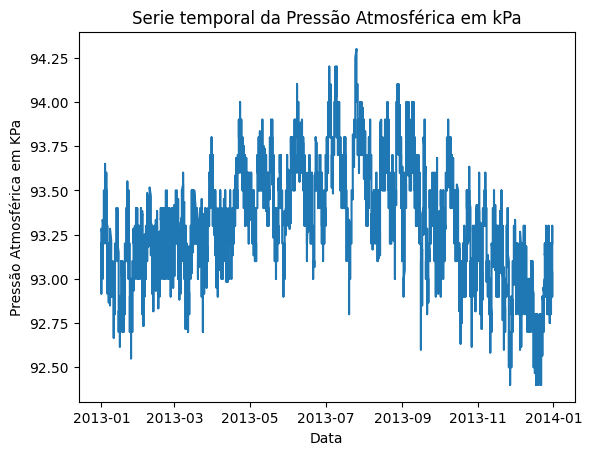

In [14]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.plot(filtered_df['Data'], filtered_df['QNH_kpa'])
plt.xlabel('Data')
plt.ylabel('Pressão Atmosférica em KPa')
plt.title('Serie temporal da Pressão Atmosférica em kPa')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Pressão Atmosférica.png')

plt.show()

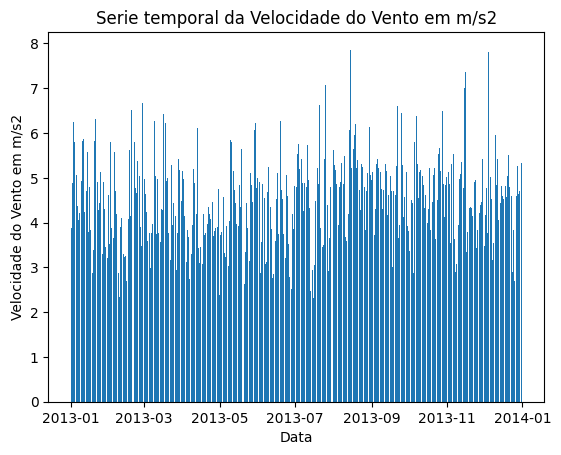

In [16]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.bar(filtered_df['Data'], filtered_df['V_wind'])
plt.xlabel('Data')
plt.ylabel('Velocidade do Vento em m/s2')
plt.title('Serie temporal da Velocidade do Vento em m/s2')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Velocidade do Vento.png')

plt.show()

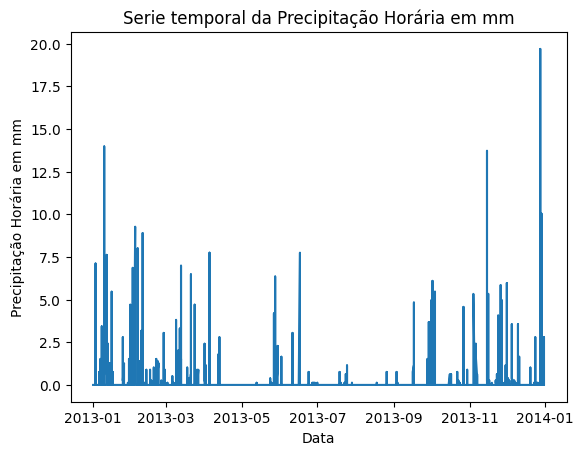

In [21]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.plot(filtered_df['Data'], filtered_df['tp_mm'])
plt.xlabel('Data')
plt.ylabel('Precipitação Horária em mm')
plt.title('Serie temporal da Precipitação Horária em mm')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Precipitação Horária.png')

plt.show()

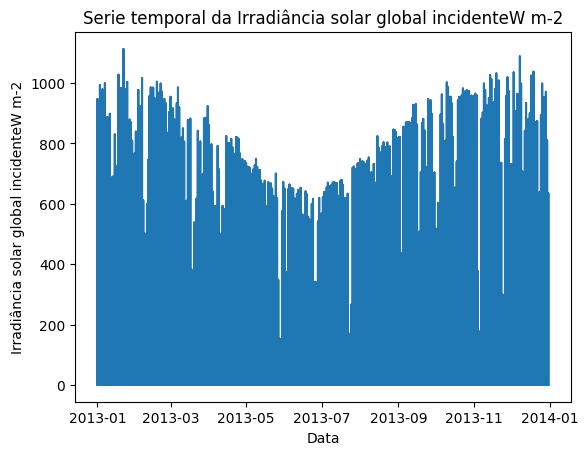

In [22]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.plot(filtered_df['Data'], filtered_df['KI'])
plt.xlabel('Data')
plt.ylabel('Irradiância solar global incidenteW m-2')
plt.title('Serie temporal da Irradiância solar global incidenteW m-2')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Irradiância solar global incidente.png')

plt.show()

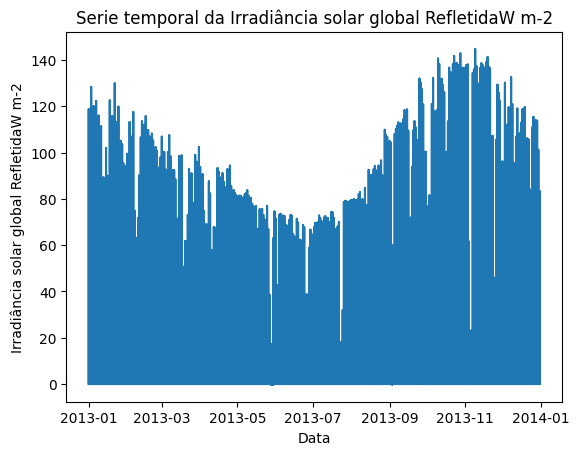

In [23]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.plot(filtered_df['Data'], filtered_df['KR'])
plt.xlabel('Data')
plt.ylabel('Irradiância solar global RefletidaW m-2')
plt.title('Serie temporal da Irradiância solar global RefletidaW m-2')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Irradiância solar global Reflitada.png')

plt.show()

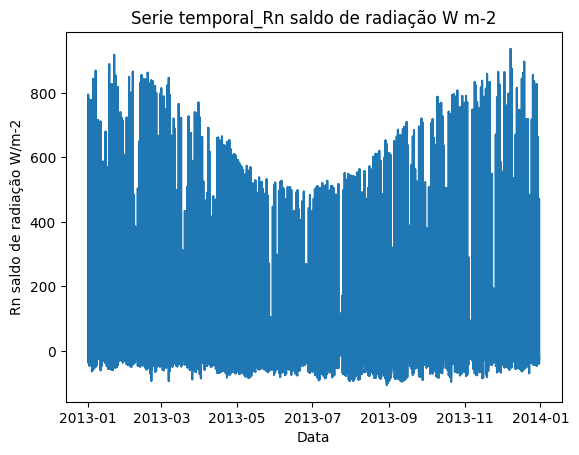

In [24]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a

plt.plot(filtered_df['Data'], filtered_df['RN'])
plt.xlabel('Data')
plt.ylabel('Rn saldo de radiação W/m-2')
plt.title('Serie temporal_Rn saldo de radiação W m-2')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/IAG_DATA2024/Rn saldo de radiação.png')

plt.show()

## Tar Temperatura do ar ºC

1.   Item de lista

1.   Item de lista
2.   Item de lista


2.   Item de lista



## calcule e plote a media diária das variáveis , comentando a variabilidade temporal (amplitude, media de longo prazo, sazonalidade): Tar Temperatura do ar ºC, UR umidade relativa %, Rain precipitação mm h-1, Ki Irradiância solar global incidenteW m-2, Rn saldo de radiação W m-.


# Tar Temperatura do ar ºC (Média diaria)



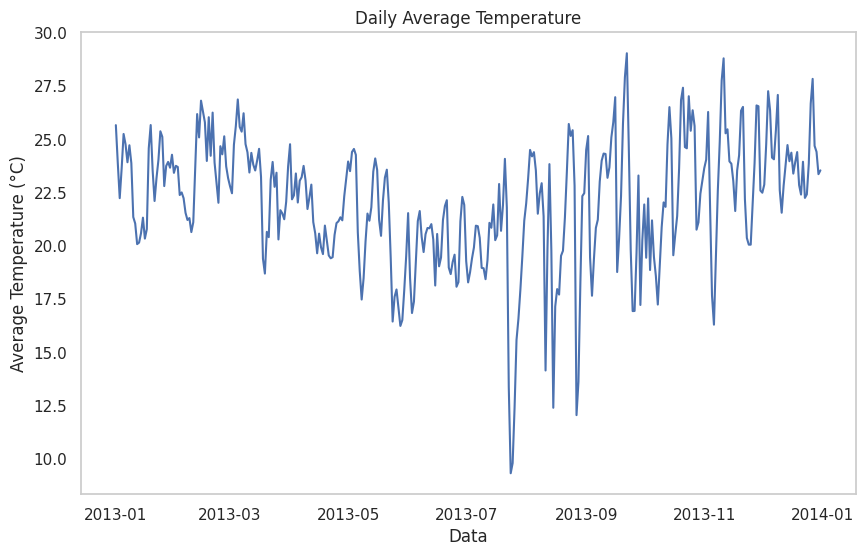

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Data' column to datetime if not already done
df2['Data'] = pd.to_datetime(df2['Data'])

# Calculate daily average temperature
daily_avg_temp = df2.groupby(df2['Data'].dt.date)['tmp'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_temp['Data'], daily_avg_temp['tmp'])
plt.xlabel('Data')
plt.ylabel('Average Temperature (°C)')
plt.title('Daily Average Temperature')
plt.xticks(rotation=0, ha='center')
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/media diária da Temperatura.png')

plt.show()

# CALCULO DE MEDIA DIARIA UMIDADE RELATIVA

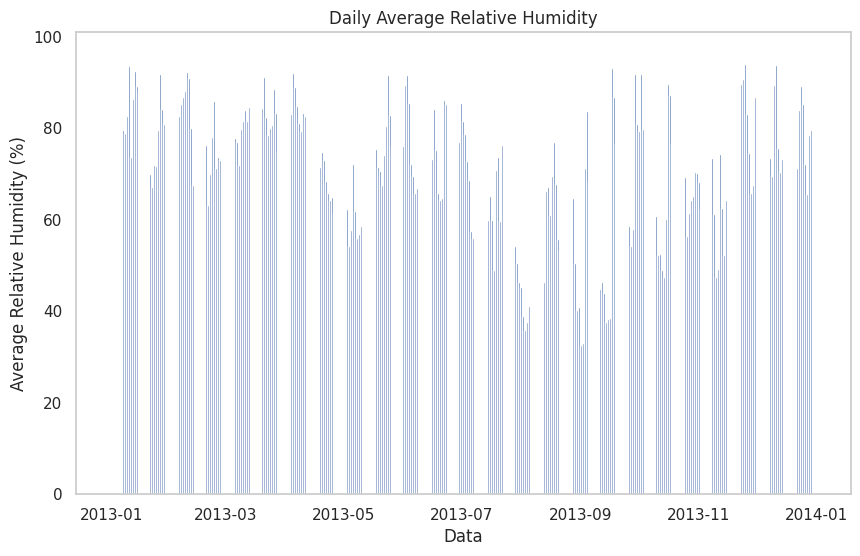

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Data' column is in datetime format
df2['Data'] = pd.to_datetime(df2['Data'])

# Calculate daily average relative humidity
daily_avg_RH = df2.groupby(df2['Data'].dt.date)['RH'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(daily_avg_RH['Data'], daily_avg_RH['RH'])
plt.xlabel('Data')
plt.ylabel('Average Relative Humidity (%)')
plt.title('Daily Average Relative Humidity')
plt.xticks(rotation=0, ha='center')
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/media diária da Humidade relativa.png')

plt.show()

# CALCULO DE MEDIA DIARIA Rain precipitação mm h-1

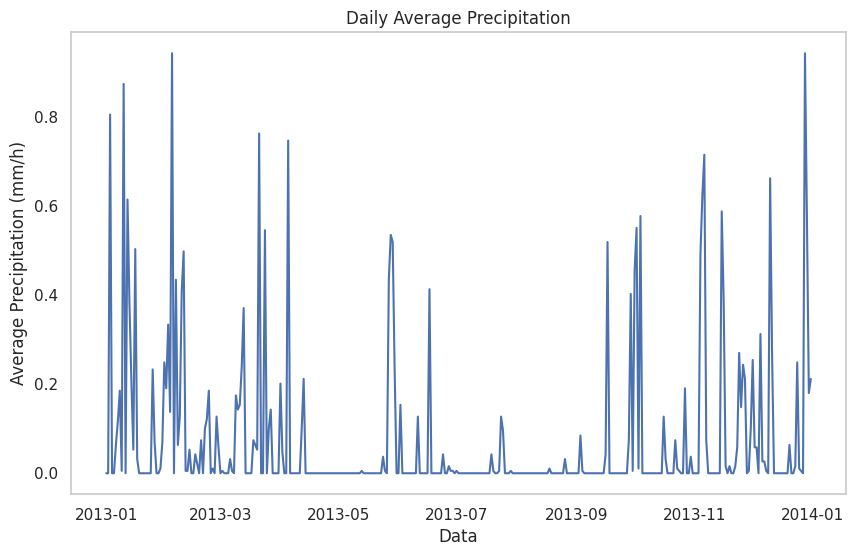

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Data' column is in datetime format
df2['Data'] = pd.to_datetime(df2['Data'])

# Calculate daily average precipitation
daily_avg_rain = df2.groupby(df2['Data'].dt.date)['tp_mm'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_rain['Data'], daily_avg_rain['tp_mm'])
plt.xlabel('Data')
plt.ylabel('Average Precipitation (mm/h)')
plt.title('Daily Average Precipitation')
plt.xticks(rotation=0)
plt.xticks(rotation=0, ha='center')
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/media diária da Precipitação.png')

plt.show()

In [ ]:
## Média diara do Ki Irradiância solar global incidenteW m-2##

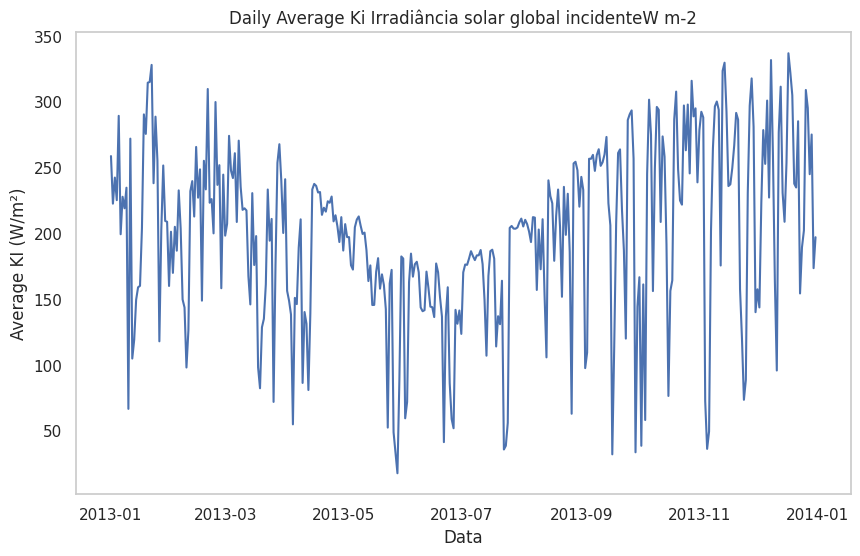

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Data' column is in datetime format
df2['Data'] = pd.to_datetime(df2['Data'])

# Calculate daily average KI
daily_avg_KI = df2.groupby(df2['Data'].dt.date)['KI'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_KI['Data'], daily_avg_KI['KI'])
plt.xlabel('Data')
plt.ylabel('Average KI (W/m²)')
plt.title('Daily Average Ki Irradiância solar global incidenteW m-2')
plt.xticks(rotation=0, ha='center')
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/media_Irradiância solar global incidente.png')

plt.show()
plt.show()

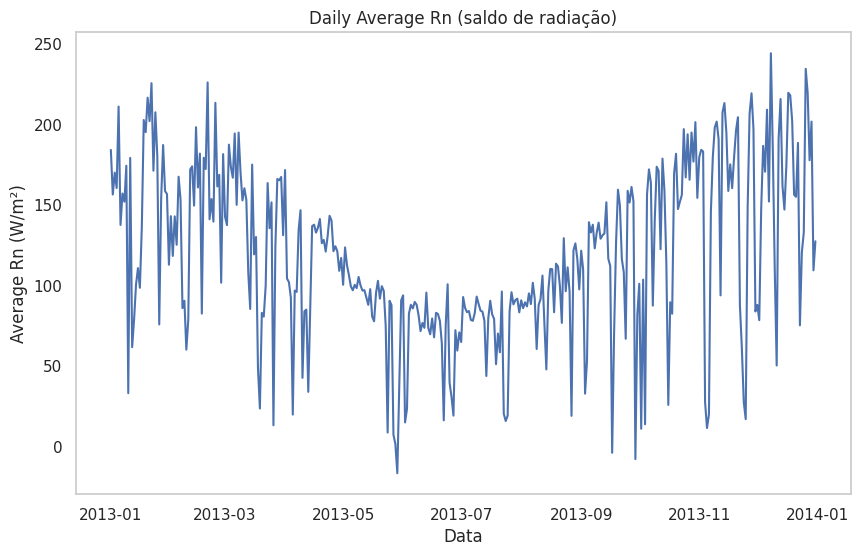

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Data' column is in datetime format
df2['Data'] = pd.to_datetime(df2['Data'])

# Calculate daily average Rn
daily_avg_Rn = df2.groupby(df2['Data'].dt.date)['RN'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_Rn['Data'], daily_avg_Rn['RN'])
plt.xlabel('Data')
plt.ylabel('Average Rn (W/m²)')
plt.title('Daily Average Rn (saldo de radiação)')
plt.xticks(rotation=0, ha='center')
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/media_saldo de radiação.png')

plt.show()

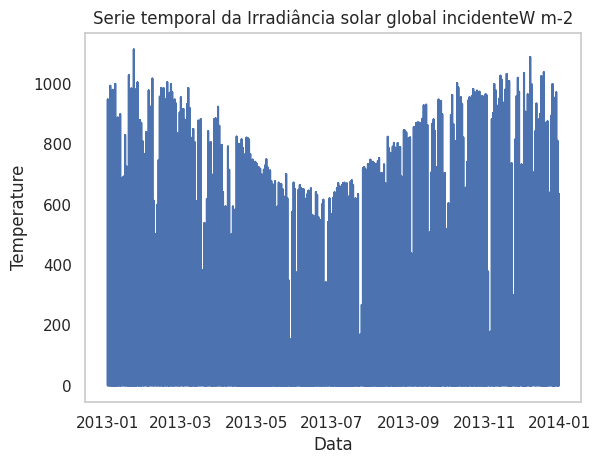

In [ ]:
# Filter data for the specified date range
filtered_df = df2[(df2['Data'] >= start_date) & (df2['Data'] <= end_date)]

# Plot 'tmp' against 'Data' for the filtered data
plt.xticks(rotation=0, ha='center') # colocar na horizontal a data
plt.plot(filtered_df['Data'], filtered_df['KI'])
plt.xlabel('Data')
plt.ylabel('Temperature')
plt.title('Serie temporal da Irradiância solar global incidenteW m-2')
plt.xticks(rotation=0)
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/Irradiância solar global incidente.png')

plt.show()

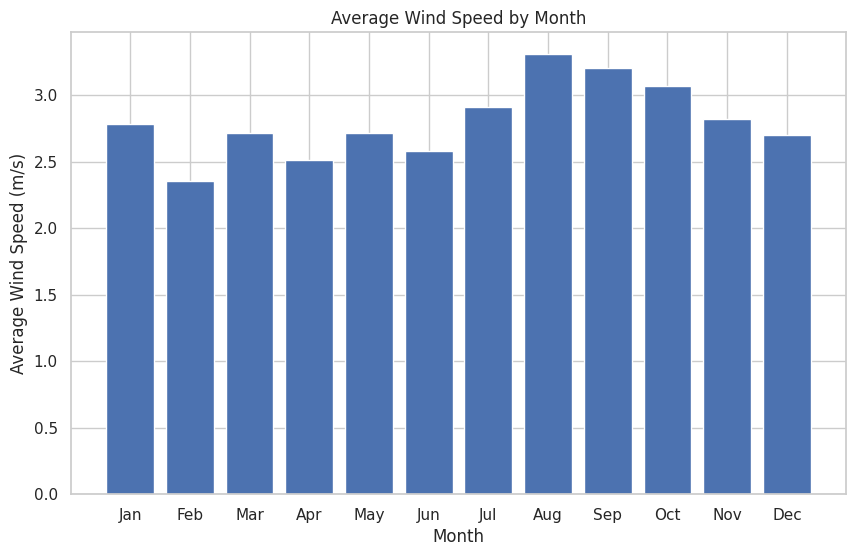

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Data' column to datetime if not already done
df2['Data'] = pd.to_datetime(df2['Data'])

# Group by month and calculate monthly average wind speed
monthly_avg_wind = df2.groupby(df2['Data'].dt.month)['V_wind'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_wind.index, monthly_avg_wind.values)
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (m/s)')
plt.title('Average Wind Speed by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

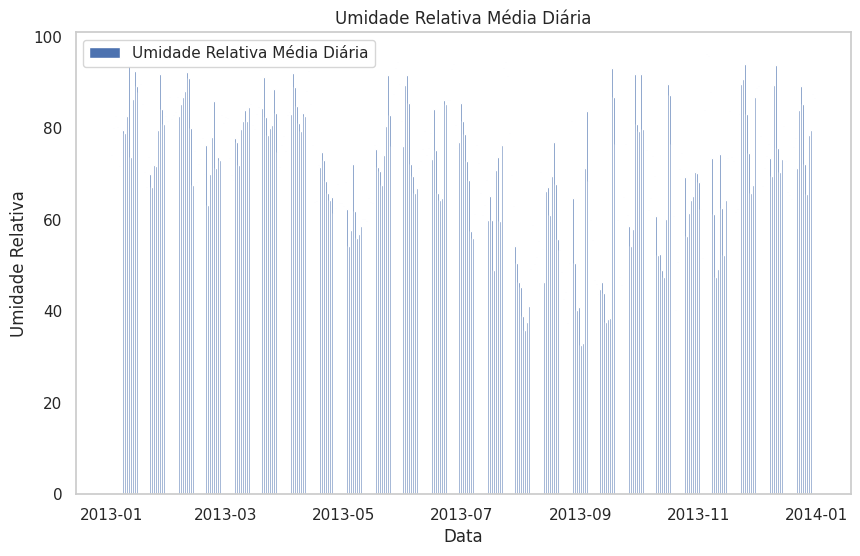

In [ ]:
# Agrupando por dia e calculando a média diária
df_diario = df2.groupby(df2['Data'].dt.date)['RH'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_diario['Data'], df_diario['RH'], label='Umidade Relativa Média Diária')
plt.title('Umidade Relativa Média Diária')
plt.xlabel('Data')
plt.ylabel('Umidade Relativa')
plt.legend()
plt.grid(False)

# Salvar a figura em um arquivo
plt.savefig( '/content/drive/MyDrive/Colab Notebooks/Data_meteo/Result_images/media diária da Humidade relativa1.png')
plt.show()